In [7]:
def convert_atm(P, u):
    if u == "gcms2":
        return P/1013.25 * 10**-3
    elif u == "mbar":
        return P/1013.25
def convert_vmr(ppm):
    return ppm * 1e-6

Comprobamos que "preassure" viene siendo P_total, por lo cual la suma de los q deberia dar 1

In [4]:
'''Midlatitude Summer'''
Ptotal = convert_atm(1.013e6, "gcms2") 
ppVs = [1.876E-02, 3.300E-04, 3.017E-08, 3.200E-07, 1.500E-07, 1.700E-06, 0.781] #porque no usamos N2?
o2 = convert_vmr(2.090E+05)
vmrs = ppVs + [o2]
print(vmrs)

[0.01876, 0.00033, 3.017e-08, 3.2e-07, 1.5e-07, 1.7e-06, 0.781, 0.209]


In [11]:
sum(vmrs)

1.00909220017

El valor de N₂ (0.781) muy probablemente ya incluye el Argón y otros gases nobles

En la atmósfera real, la presencia de vapor de agua (H₂O = 0.01876) hace que la suma de fracciones volumétricas pueda ser ligeramente mayor que 1

Puede haber pequeños redondeos en los datos del perfil

In [6]:
sum(ppVs)

0.80009220017

In [7]:
a = [1.876e+04/1e6, 330/1e6, 0.03017/1e6, 0.32/1e6, 0.15/1e6, 1.7/1e6, 0.20946]
sum(a)

0.22855220017

**Calculando los Pmol**

In [ ]:
Pmol_values = [q*Ptotal for q in vmrs]
print(Ptotal)
print(Pmol_values)
print(sum(Pmol_values))
print(sum(vmrs))

0.999753269183321
[0.0187553713298791, 0.0003299185788304959, 3.016255613126079e-08, 3.1992104613866274e-07, 1.4996299037749815e-07, 1.6995805576116458e-06, 0.7808073032321737, 0.2089484332593141]
1.0088432260273477
1.00909220017


Calculando firma

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True
DEBUG: CO2 qfile=TIPS/q7.txt exists=True
DEBUG: O3 qfile=TIPS/q16.txt exists=True
DEBUG: N2O qfile=TIPS/q21.txt exists=True
DEBUG: CO qfile=TIPS/q26.txt exists=True
DEBUG: CH4 qfile=TIPS/q32.txt exists=True
DEBUG: O2 qfile=TIPS/q36.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

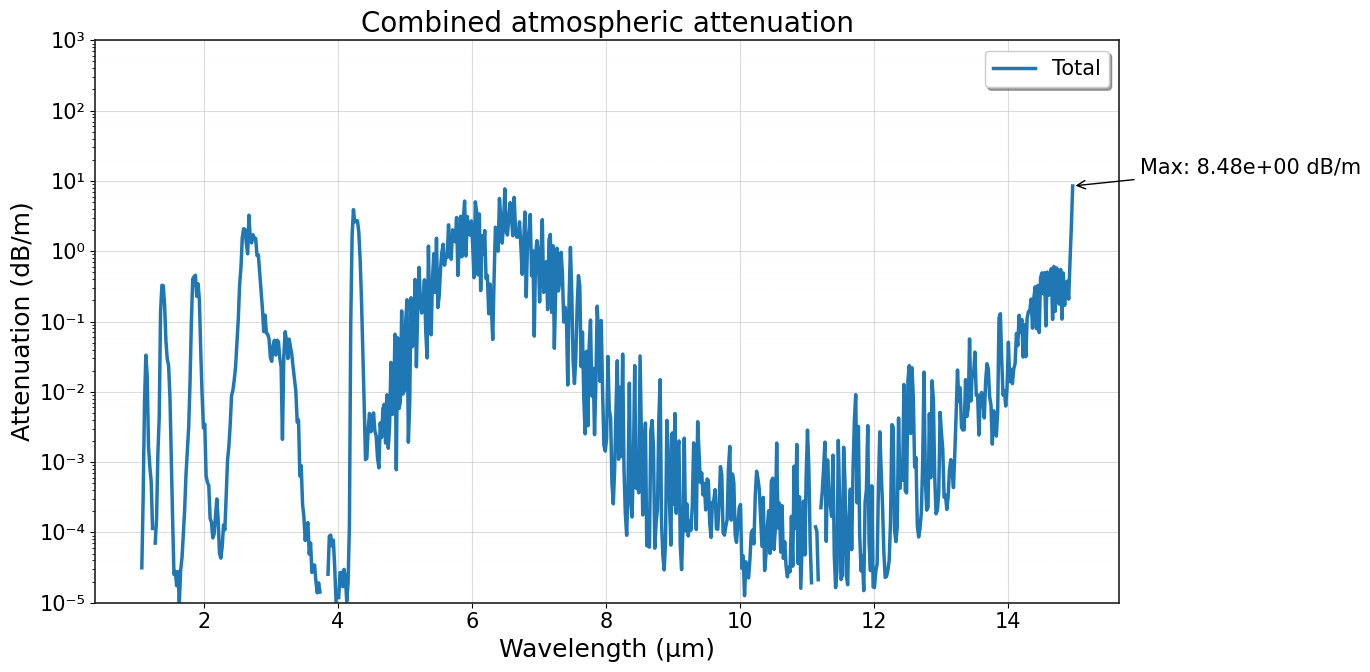

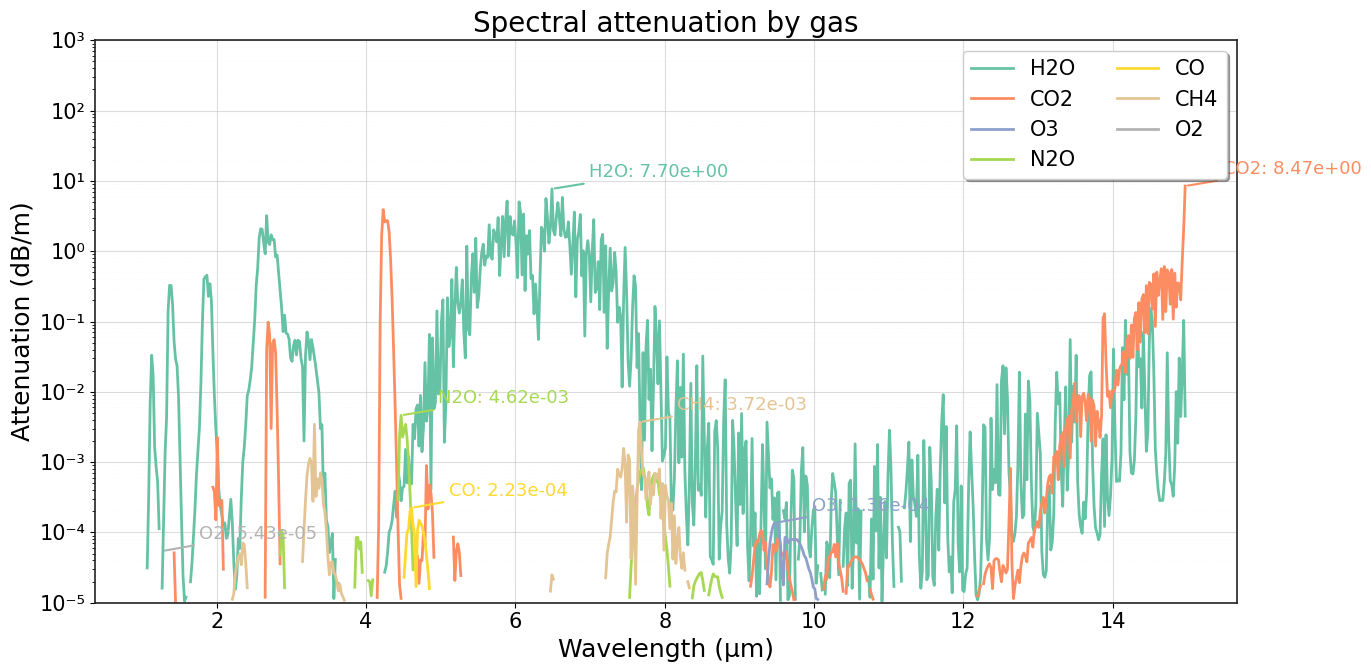

In [3]:
#Julian
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species

# Carga de isopologues (por si quieres usarlos explícitamente)
qfileH2O = 'TIPS\q1.txt'
qfileCO2 = 'TIPS\q7.txt'
qfileO3  = 'TIPS\q16.txt'
qfileN2O = 'TIPS\q21.txt'
qfileCO  = 'TIPS\q26.txt'
qfileCH4 = 'TIPS\q32.txt'
qfileO2  = 'TIPS\q36.txt'

sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 1.876e+04/1e6 #Esta mal, para mi
     if s.name == 'CO2': s.Pmol = 330/1e6
     if s.name == 'O3': s.Pmol = 0.03017/1e6
     if s.name == 'N2O': s.Pmol = 0.32/1e6
     if s.name == 'CO': s.Pmol = 0.15/1e6
     if s.name == 'CH4': s.Pmol = 1.7/1e6
     if s.name == 'O2': s.Pmol = 0.20946


import os
print(os.getcwd())

res = run_simulation(
    parfile='68da838c.par',
    species=sp,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=296.0, L_m=1.0, pres=1.0,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True,
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True
DEBUG: CO2 qfile=TIPS/q7.txt exists=True
DEBUG: O3 qfile=TIPS/q16.txt exists=True
DEBUG: N2O qfile=TIPS/q21.txt exists=True
DEBUG: CO qfile=TIPS/q26.txt exists=True
DEBUG: CH4 qfile=TIPS/q32.txt exists=True
DEBUG: O2 qfile=TIPS/q36.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

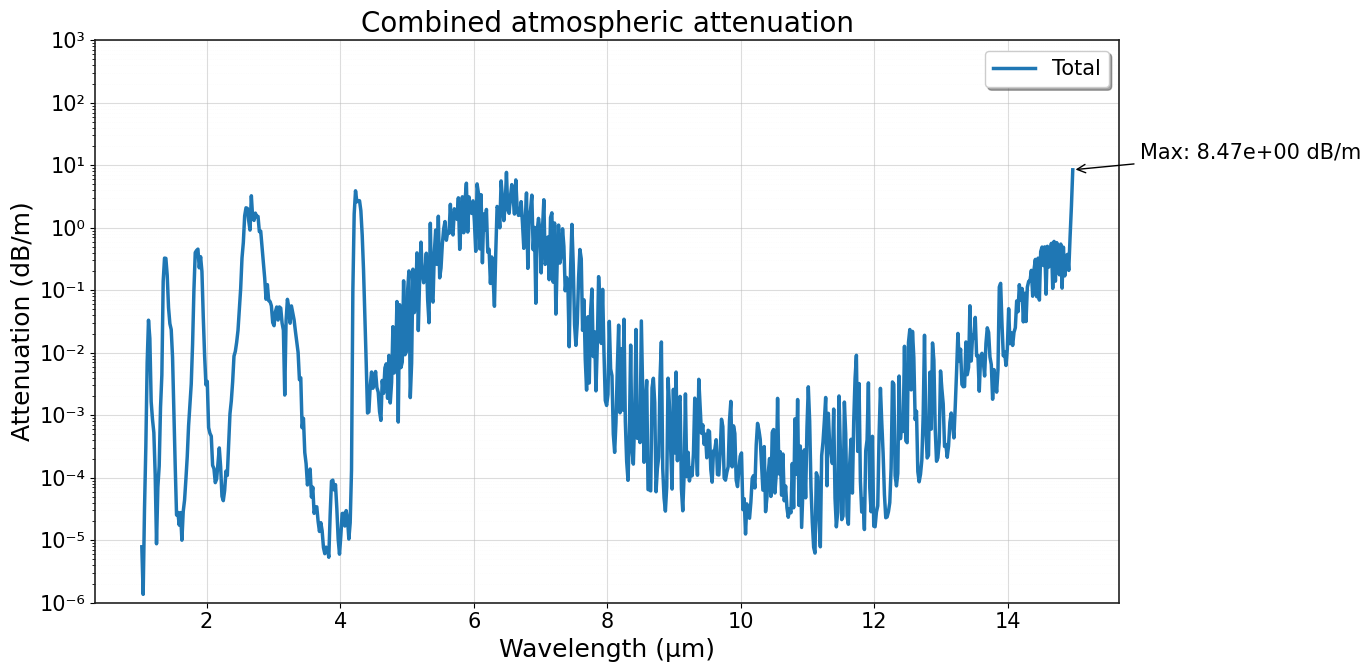

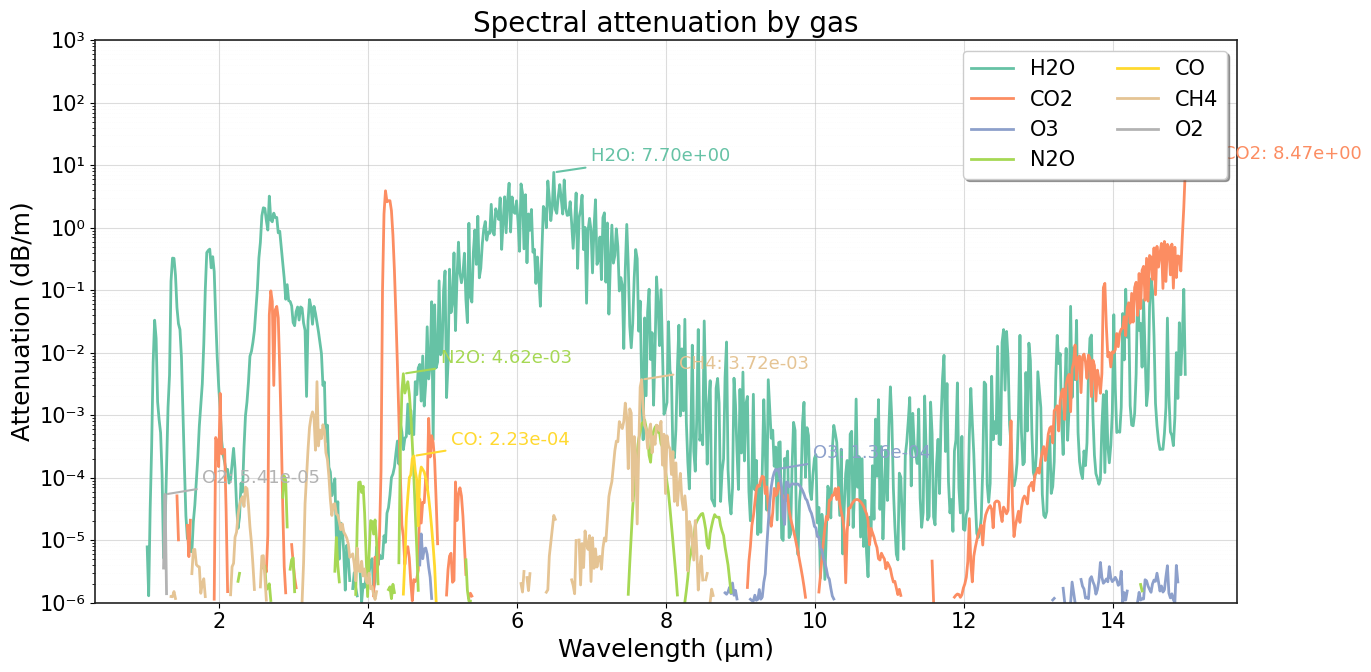

In [2]:
#Nuevos valores
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species

# Carga de isopologues (por si quieres usarlos explícitamente)
qfileH2O = 'TIPS\q1.txt'
qfileCO2 = 'TIPS\q7.txt'
qfileO3  = 'TIPS\q16.txt'
qfileN2O = 'TIPS\q21.txt'
qfileCO  = 'TIPS\q26.txt'
qfileCH4 = 'TIPS\q32.txt'
qfileO2  = 'TIPS\q36.txt'

sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0.0187553713298791
     if s.name == 'CO2': s.Pmol = 0.0003299185788304959
     if s.name == 'O3': s.Pmol = 3.016255613126079e-08
     if s.name == 'N2O': s.Pmol = 3.1992104613866274e-07
     if s.name == 'CO': s.Pmol = 1.4996299037749815e-07
     if s.name == 'CH4': s.Pmol = 1.6995805576116458e-06
     if s.name == 'O2': s.Pmol = 0.2089484332593141


import os
print(os.getcwd())

res = run_simulation(
    parfile='68da838c.par',
    species=sp,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=296.0, L_m=1.0, pres=1.0,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True,
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

In [104]:
#OTRO VALOR DE P si va a afectar
a = convert_atm(0.6250, "gcms2")
print(a)

6.16827041697508e-07


c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True
DEBUG: CO2 qfile=TIPS/q7.txt exists=True
DEBUG: O3 qfile=TIPS/q16.txt exists=True
DEBUG: N2O qfile=TIPS/q21.txt exists=True
DEBUG: CO qfile=TIPS/q26.txt exists=True
DEBUG: CH4 qfile=TIPS/q32.txt exists=True
DEBUG: O2 qfile=TIPS/q36.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

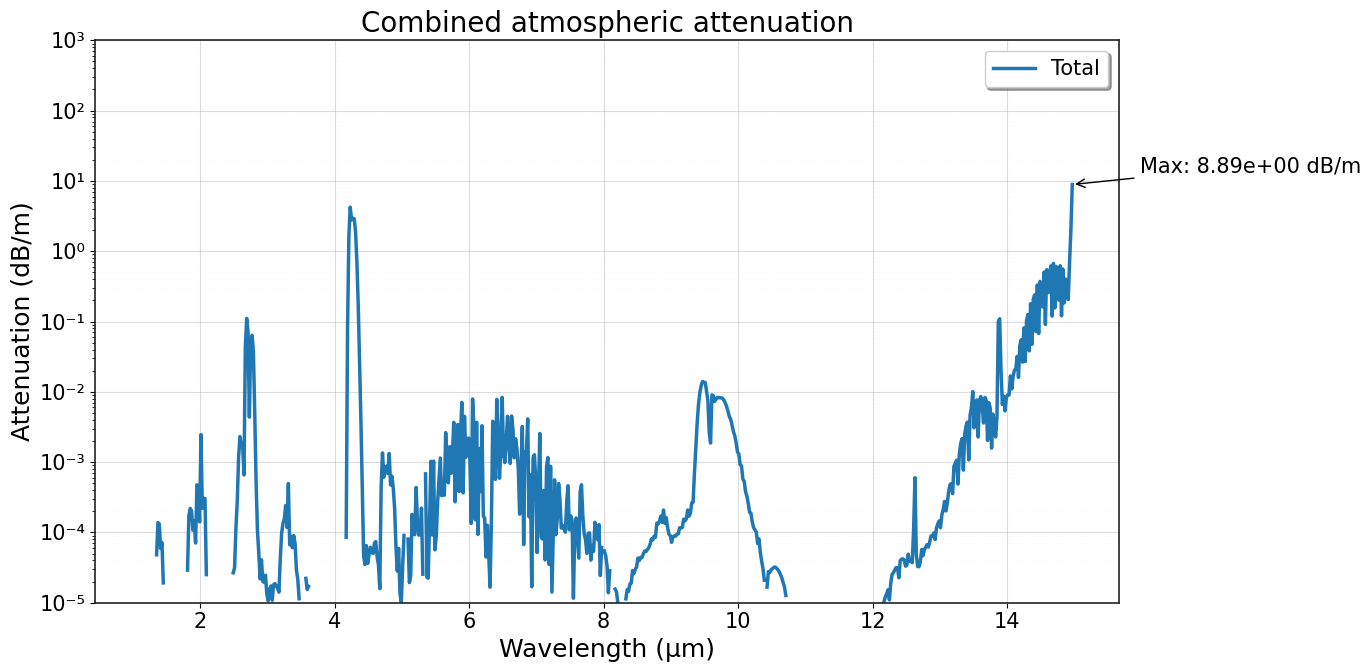

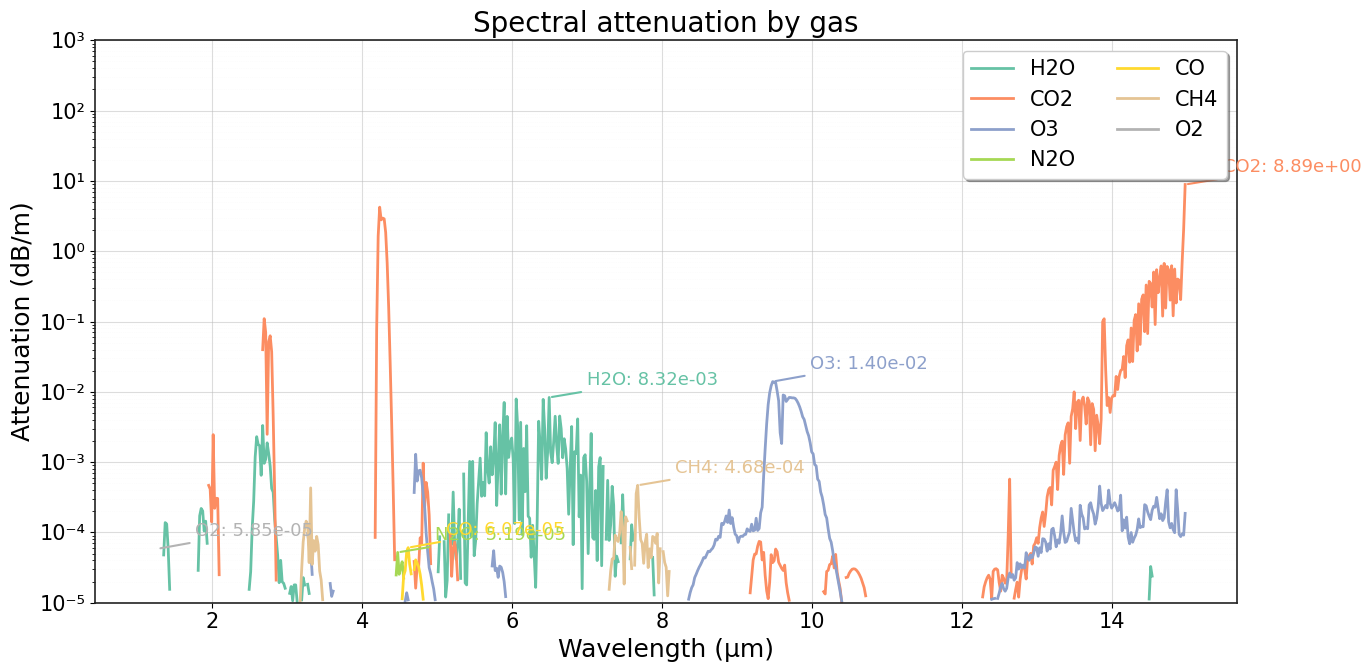

In [5]:
#Julian 50
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species

# Carga de isopologues (por si quieres usarlos explícitamente)
qfileH2O = 'TIPS\q1.txt'
qfileCO2 = 'TIPS\q7.txt'
qfileO3  = 'TIPS\q16.txt'
qfileN2O = 'TIPS\q21.txt'
qfileCO  = 'TIPS\q26.txt'
qfileCH4 = 'TIPS\q32.txt'
qfileO2  = 'TIPS\q36.txt'

sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 5.500e-06
     if s.name == 'CO2': s.Pmol = 3.300e-04
     if s.name == 'O3': s.Pmol = 2.800e-06
     if s.name == 'N2O': s.Pmol = 3.215e-09
     if s.name == 'CO': s.Pmol = 3.645e-08
     if s.name == 'CH4': s.Pmol = 1.944e-07
     if s.name == 'O2': s.Pmol = 2.090e5/1e6


import os
print(os.getcwd())

res = run_simulation(
    parfile='68da838c.par',
    species=sp,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=275.70, L_m=1.0, pres=1.0,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True,
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

In [8]:
Ptotal = convert_atm(951.0 , "gcms2") 
ppVs = [5.500E-06,  3.300E-04,  2.800E-06,  3.215E-09,  3.645E-08,  1.944E-07] #SE NECESITA N2 PARA QUE sum(Pmol_values)=Ptotal
o2 = convert_vmr(2.090E+05)
vmrs = ppVs + [o2]

Pmol_values = [q*Ptotal for q in vmrs]
print(Ptotal)
print(sum(ppVs)+o2 + 0.781)
print(Pmol_values)
print(sum(Pmol_values))

0.0009385640266469282
0.990338534065
[5.1621021465581044e-09, 3.097261287934863e-07, 2.627979274611399e-09, 3.0174833456698744e-12, 3.421065877128053e-11, 1.8245684678016282e-10, 0.000196159881569208]
0.00019647761746441155


https://www.calculand.com/unit-converter/?gruppe=Pressure&einheit=Gram+per+centimetre+second+squared+%5Bg%2Fcm+s%C2%B2%5D

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True
DEBUG: CO2 qfile=TIPS/q7.txt exists=True
DEBUG: O3 qfile=TIPS/q16.txt exists=True
DEBUG: N2O qfile=TIPS/q21.txt exists=True
DEBUG: CO qfile=TIPS/q26.txt exists=True
DEBUG: CH4 qfile=TIPS/q32.txt exists=True
DEBUG: O2 qfile=TIPS/q36.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

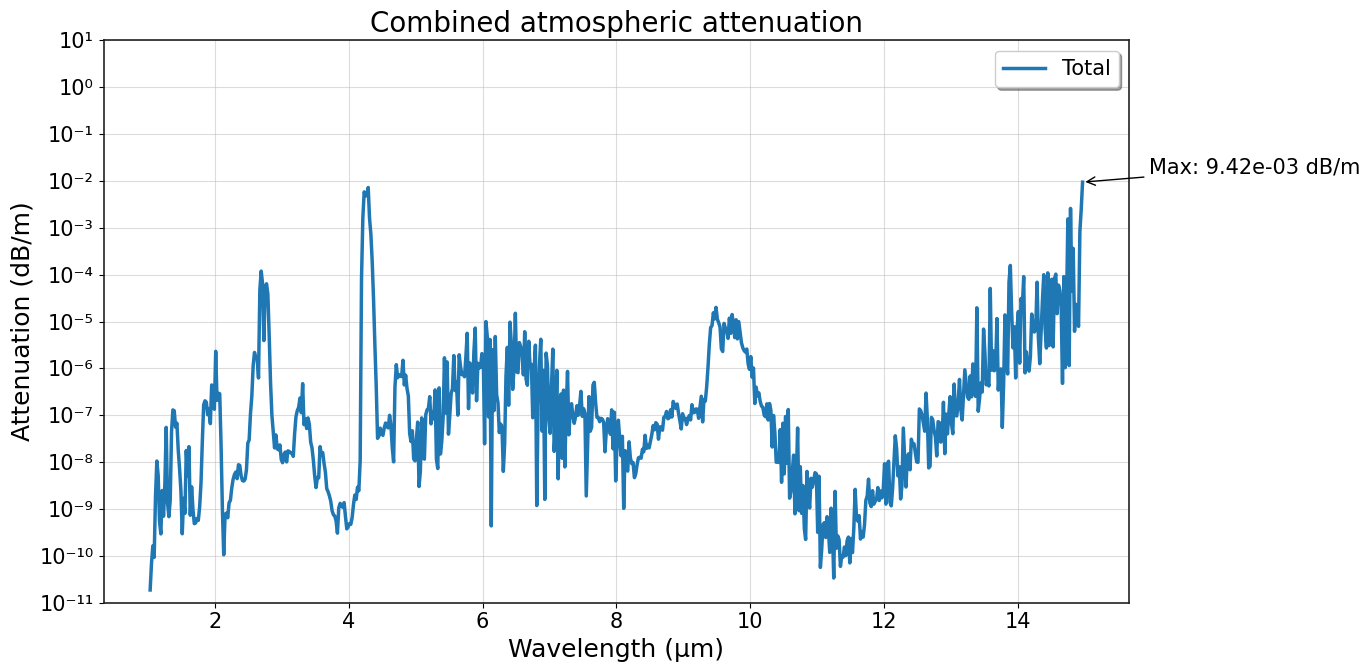

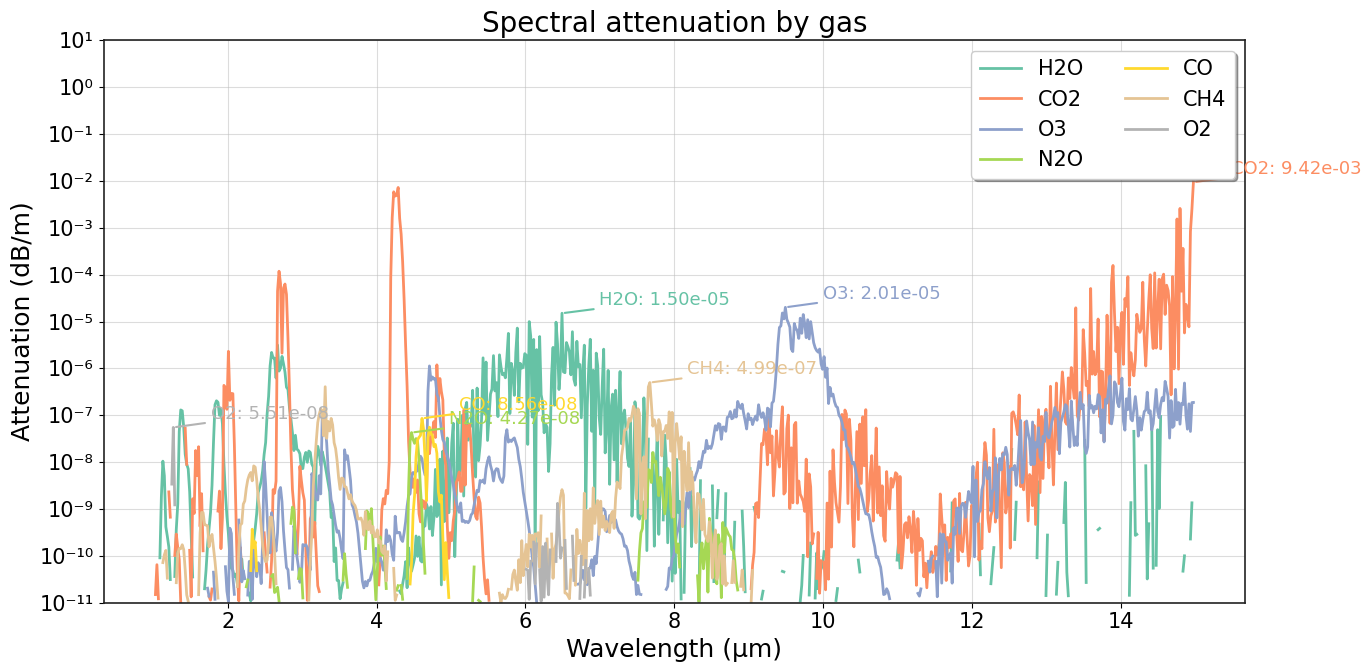

In [10]:
#Nuevos valores
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species


for s in sp:
     if s.name == 'H2O': s.Pmol = 5.1621021465581044e-09
     if s.name == 'CO2': s.Pmol = 3.097261287934863e-07
     if s.name == 'O3': s.Pmol = 2.627979274611399e-09
     if s.name == 'N2O': s.Pmol = 3.0174833456698744e-12
     if s.name == 'CO': s.Pmol = 3.421065877128053e-11
     if s.name == 'CH4': s.Pmol = 1.8245684678016282e-10
     if s.name == 'O2': s.Pmol = 0.000196159881569208


import os
print(os.getcwd())

res = run_simulation(
    parfile='68da838c.par',
    species=sp,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=275.70, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True,
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True
DEBUG: CO2 qfile=TIPS/q7.txt exists=True
DEBUG: O3 qfile=TIPS/q16.txt exists=True
DEBUG: N2O qfile=TIPS/q21.txt exists=True
DEBUG: CO qfile=TIPS/q26.txt exists=True
DEBUG: CH4 qfile=TIPS/q32.txt exists=True
DEBUG: O2 qfile=TIPS/q36.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

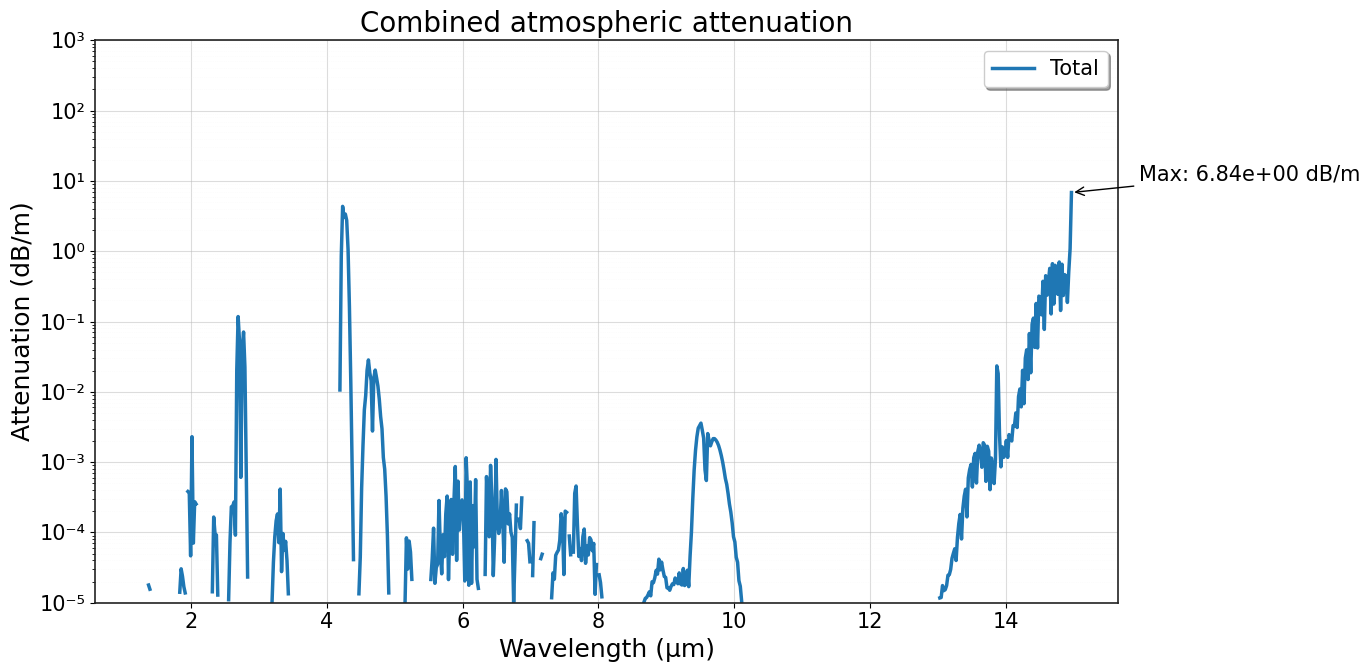

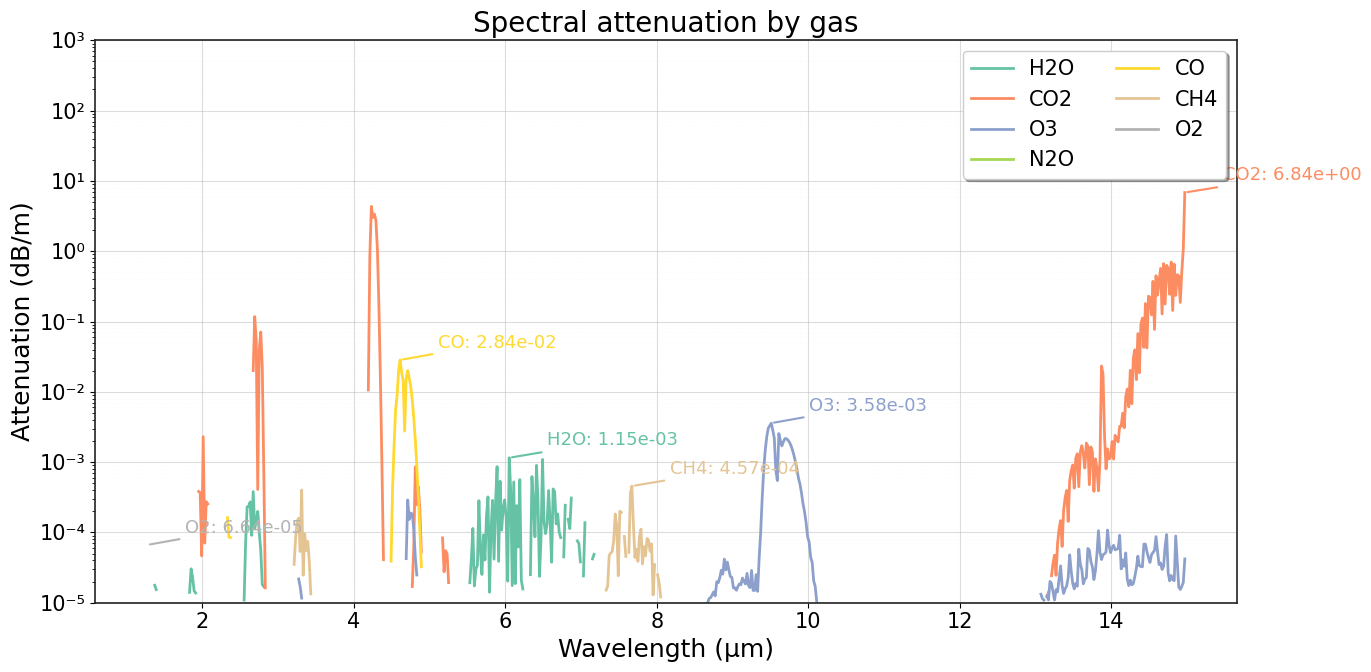

In [ ]:
#Julian 100

sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 4.000e-07
     if s.name == 'CO2': s.Pmol = 1.950e-04
     if s.name == 'O3': s.Pmol = 4.000e-07
     if s.name == 'N2O': s.Pmol = 2.844e-10
     if s.name == 'CO': s.Pmol = 1.008e-05
     if s.name == 'CH4': s.Pmol = 1.200e-07
     if s.name == 'O2': s.Pmol = 1.600e5/1e6


import os
print(os.getcwd())

res = run_simulation(
    parfile='68da838c.par',
    species=sp,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=190.50, L_m=1.0, Pair=1.0,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True,
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

In [17]:
Ptotal = convert_atm(0.2580 , "gcms2") 
ppVs = [4.000E-07, 1.950E-04, 4.000E-07, 2.844E-10, 1.008E-05, 1.200E-07] 
o2 = convert_vmr(1.600E+05)
vmrs = ppVs + [o2]

Pmol_values = [q*Ptotal for q in vmrs]
print(Ptotal)
print(sum(vmrs)+0.777)
print(Pmol_values)
print(sum(Pmol_values))

2.5462620281273133e-07
0.9372060002844
[1.0185048112509252e-13, 4.965210954848261e-11, 1.0185048112509252e-13, 7.24156920799408e-17, 2.5666321243523317e-12, 3.055514433752776e-14, 4.074019245003701e-08]
4.079264552023213e-08


c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True
DEBUG: CO2 qfile=TIPS/q7.txt exists=True
DEBUG: O3 qfile=TIPS/q16.txt exists=True
DEBUG: N2O qfile=TIPS/q21.txt exists=True
DEBUG: CO qfile=TIPS/q26.txt exists=True
DEBUG: CH4 qfile=TIPS/q32.txt exists=True
DEBUG: O2 qfile=TIPS/q36.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:39: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv 

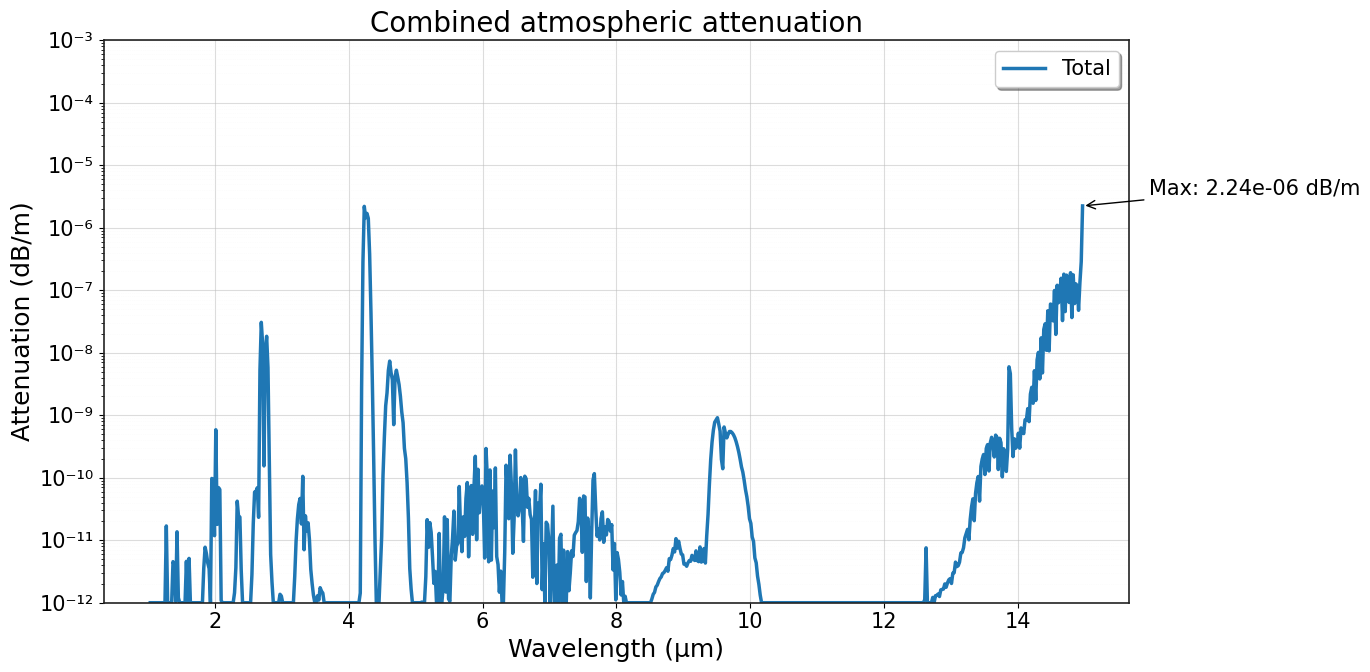

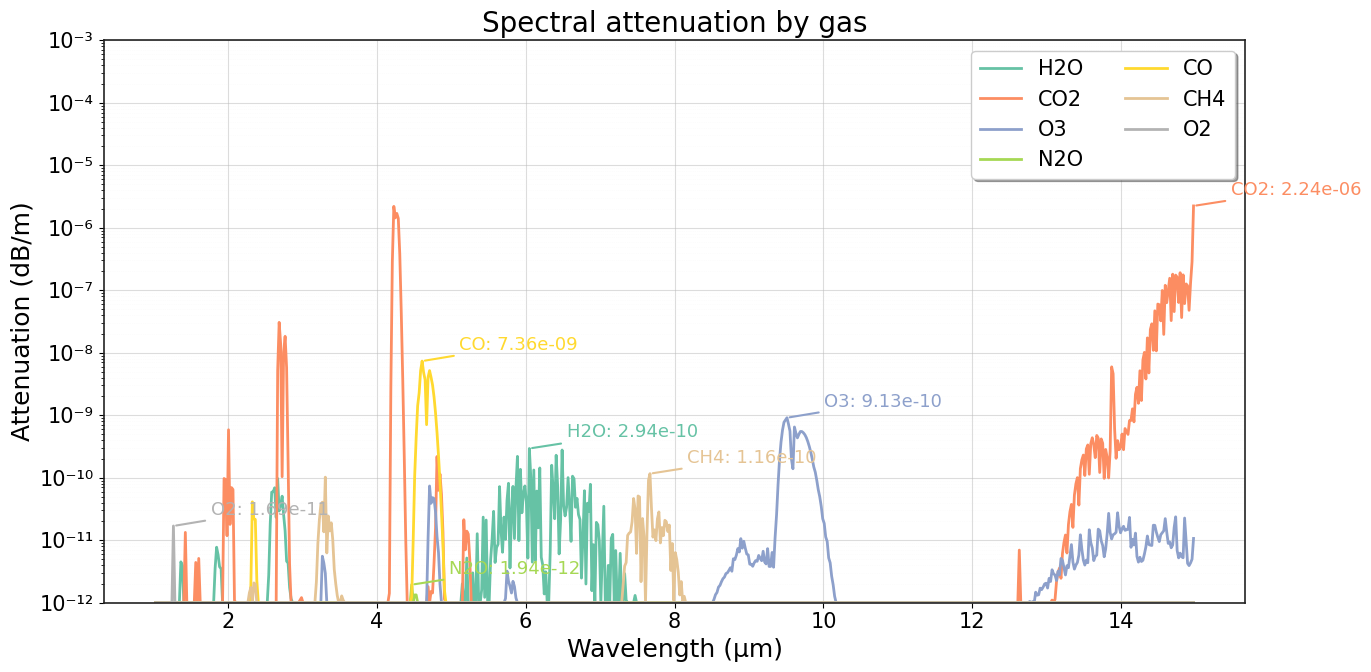

In [38]:
#Nuevos valores
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species


sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 1.0185048112509252e-13
     if s.name == 'CO2': s.Pmol = 4.965210954848261e-11
     if s.name == 'O3': s.Pmol = 1.0185048112509252e-13
     if s.name == 'N2O': s.Pmol = 7.24156920799408e-17
     if s.name == 'CO': s.Pmol = 2.5666321243523317e-12
     if s.name == 'CH4': s.Pmol = 3.055514433752776e-14
     if s.name == 'O2': s.Pmol = 4.074019245003701e-08


import os
print(os.getcwd())

res = run_simulation(
    parfile='68da838c.par',
    species=sp,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=190.50, L_m=1.0, Pair=1.0,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True,
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

In [19]:
#Uss
preassure = convert_atm(1.013E+03, "mbar")
ppms = [7.745E+03, 330, 2.660E-02, 0.320,  0.150, 1.70, 2.090E+05]
ppVs = [convert_vmr(ppm) for ppm in ppms]
Pmoles = [ppV*preassure for ppV in ppVs]
print(preassure)
print(sum(Pmoles)+0.781) #xd??
print(ppVs)

0.999753269183321
0.9980236369660005
[0.007744999999999999, 0.00033, 2.6599999999999997e-08, 3.2e-07, 1.5e-07, 1.6999999999999998e-06, 0.209]
